In [1]:
# import numpy as np
import pandas as pd

import matplotlib.pyplot as plt 
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.utils.class_weight import compute_class_weight

# Import Logistic Regression
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

from sklearn.metrics import accuracy_score

import tensorflow as tf

In [2]:
data=pd.read_csv(r"C:\Users\prabh\Desktop\data set\Kickstarter\ks-projects-201801.csv")

In [3]:
data.head(5)

,ID,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged,usd_pledged_real,usd_goal_real
0,1000002330,The Songs of Adelaide & Abullah,Poetry,Publishing,GBP,2015-10-09,1000.0,2015-08-11 12:12:28,0.0,failed,0,GB,0.0,0.0,1533.95
1,1000003930,Greeting From Earth: ZGAC Arts Capsule For ET,Narrative Film,Film & Video,USD,2017-11-01,30000.0,2017-09-02 04:43:57,2421.0,failed,15,US,100.0,2421.0,30000.00
2,1000004038,Where is Hank?,Narrative Film,Film & Video,USD,2013-02-26,45000.0,2013-01-12 00:20:50,220.0,failed,3,US,220.0,220.0,45000.00
3,1000007540,ToshiCapital Rekordz Needs Help to Complete Album,Music,Music,USD,2012-04-16,5000.0,2012-03-17 03:24:11,1.0,failed,1,US,1.0,1.0,5000.00
4,1000011046,Community Film Project: The Art of Neighborhoo...,Film & Video,Film & Video,USD,2015-08-29,19500.0,2015-07-04 08:35:03,1283.0,canceled,14,US,1283.0,1283.0,19500.00


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 378661 entries, 0 to 378660
Data columns (total 15 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   ID                378661 non-null  int64  
 1   name              378657 non-null  object 
 2   category          378661 non-null  object 
 3   main_category     378661 non-null  object 
 4   currency          378661 non-null  object 
 5   deadline          378661 non-null  object 
 6   goal              378661 non-null  float64
 7   launched          378661 non-null  object 
 8   pledged           378661 non-null  float64
 9   state             378661 non-null  object 
 10  backers           378661 non-null  int64  
 11  country           378661 non-null  object 
 12  usd pledged       374864 non-null  float64
 13  usd_pledged_real  378661 non-null  float64
 14  usd_goal_real     378661 non-null  float64
dtypes: float64(5), int64(2), object(8)
memory usage: 43.3+ MB


### Data preprocessing and Cleaning

In [5]:
#Drop the unwanted columns.
unneeded_columns=['ID','name']
data=data.drop(unneeded_columns,axis=1)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 378661 entries, 0 to 378660
Data columns (total 13 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   category          378661 non-null  object 
 1   main_category     378661 non-null  object 
 2   currency          378661 non-null  object 
 3   deadline          378661 non-null  object 
 4   goal              378661 non-null  float64
 5   launched          378661 non-null  object 
 6   pledged           378661 non-null  float64
 7   state             378661 non-null  object 
 8   backers           378661 non-null  int64  
 9   country           378661 non-null  object 
 10  usd pledged       374864 non-null  float64
 11  usd_pledged_real  378661 non-null  float64
 12  usd_goal_real     378661 non-null  float64
dtypes: float64(5), int64(1), object(7)
memory usage: 37.6+ MB


#### Check the null values in the dataset 

In [7]:
data.isnull().sum()

category               0
main_category          0
currency               0
deadline               0
goal                   0
launched               0
pledged                0
state                  0
backers                0
country                0
usd pledged         3797
usd_pledged_real       0
usd_goal_real          0
dtype: int64

In [8]:
data['usd pledged']=data['usd pledged'].fillna(data['usd pledged'].mean())

In [9]:
data.isnull().sum()

category            0
main_category       0
currency            0
deadline            0
goal                0
launched            0
pledged             0
state               0
backers             0
country             0
usd pledged         0
usd_pledged_real    0
usd_goal_real       0
dtype: int64

#### Reomove  values like  'canceled', 'live', 'undefined'  'suspended' from state columns
     '

In [10]:
data['state'].unique()

array(['failed', 'canceled', 'successful', 'live', 'undefined',
       'suspended'], dtype=object)

In [11]:
data.query('state != "failed" and state!= "successful"')

,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged,usd_pledged_real,usd_goal_real
4,Film & Video,Film & Video,USD,2015-08-29,19500.0,2015-07-04 08:35:03,1283.00,canceled,14,US,1283.00,1283.00,19500.00
8,Product Design,Design,USD,2014-05-29,125000.0,2014-04-24 18:14:43,8233.00,canceled,58,US,8233.00,8233.00,125000.00
9,Documentary,Film & Video,USD,2014-08-10,65000.0,2014-07-11 21:55:48,6240.57,canceled,43,US,6240.57,6240.57,65000.00
40,Nonfiction,Publishing,CAD,2018-01-19,3000.0,2017-11-20 18:15:14,592.00,live,24,CA,185.65,472.88,2396.36
68,Design,Design,CAD,2015-08-07,15000.0,2015-07-08 21:46:53,700.00,canceled,6,CA,553.32,535.09,11466.14
...,...,...,...,...,...,...,...,...,...,...,...,...,...
378640,Fiction,Publishing,USD,2014-09-11,1000.0,2014-08-08 21:49:31,100.00,canceled,2,US,100.00,100.00,1000.00
378643,3D Printing,Technology,USD,2014-05-26,6500.0,2014-05-05 20:22:45,0.00,canceled,0,US,0.00,0.00,6500.00
378648,Tabletop Games,Games,USD,2016-02-23,500.0,2016-01-24 16:03:27,121.00,canceled,5,US,121.00,121.00,500.00
378655,Poetry,Publishing,CAD,2014-09-20,5500.0,2014-08-06 03:46:07,0.00,canceled,0,CA,0.00,0.00,4949.60


In [12]:
data.shape

(378661, 13)

In [13]:
# remove all the columns having state value  'canceled','live', 'undefined','suspended'
data=data.drop(data.query('state != "failed" and state!= "successful"').index,axis=0).reset_index(drop=True)

In [14]:
data.shape

(331675, 13)

In [15]:
data['state'].unique()

array(['failed', 'successful'], dtype=object)

<h3 align='Center'>Visualization</h3>

###  Goal vs Pledged Amount 

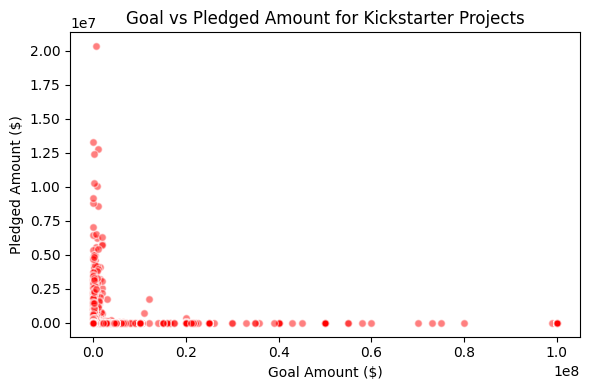

In [16]:
data['goal'] = pd.to_numeric(data['goal'], errors='coerce')
data['pledged'] = pd.to_numeric(data['pledged'], errors='coerce')
# Drop rows where 'goal' or 'pledged' is NaN
data_cleaned = data.dropna(subset=['goal', 'pledged'])
# Plotting the Scatter Plot
plt.figure(figsize=(6, 4))
plt.scatter(data_cleaned['goal'], data_cleaned['pledged'], alpha=0.5, color='red', edgecolors='w', s=30)
# Add labels and title
plt.xlabel('Goal Amount ($)')
plt.ylabel('Pledged Amount ($)')
plt.title('Goal vs Pledged Amount for Kickstarter Projects')
# Show the plot
plt.tight_layout()
plt.show()

### Success Rate by Category

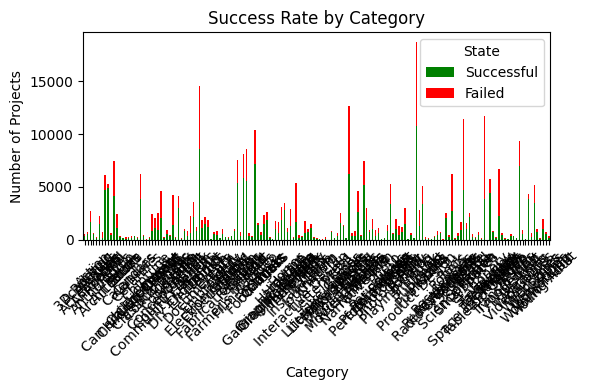

In [17]:
# Create a pivot table with counts for each category and state
category_success_rate = pd.pivot_table(data, index='category', columns='state', aggfunc='size', fill_value=0)

# Plot the stacked bar chart
category_success_rate.plot(kind='bar', stacked=True, figsize=(6,4), color=['green', 'red'])

# Add labels and title
plt.xlabel('Category')
plt.ylabel('Number of Projects')
plt.title('Success Rate by Category')
plt.xticks(rotation=45)
plt.legend(title='State', labels=['Successful', 'Failed'])

# Show the plot
plt.tight_layout()
plt.show()

### Success Rate by Country

<Figure size 1000x600 with 0 Axes>

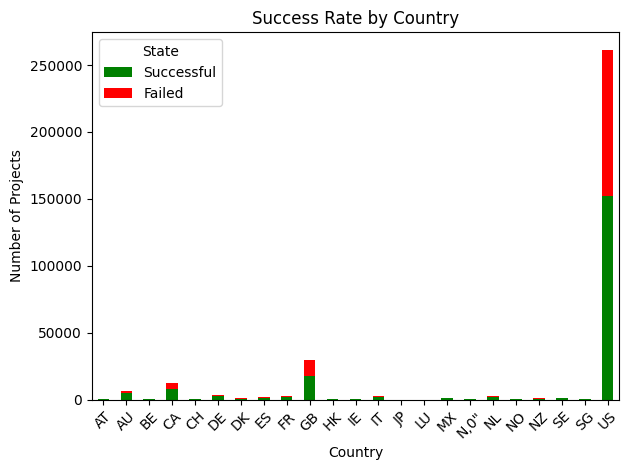

In [18]:
# Group by 'country' and 'state' and count the occurrences
country_success_rate = data.groupby(['country', 'state']).size().unstack(fill_value=0)

plt.figure(figsize=(10, 6))
country_success_rate.plot(kind='bar', stacked=True, color=['green', 'red'])

# Add labels and title
plt.xlabel('Country')
plt.ylabel('Number of Projects')
plt.title('Success Rate by Country')
plt.xticks(rotation=45)
plt.legend(title='State', labels=['Successful', 'Failed'])

# Show the plot
plt.tight_layout()
plt.show()

### Projects Launched vs Successful Projects

<Figure size 1200x600 with 0 Axes>

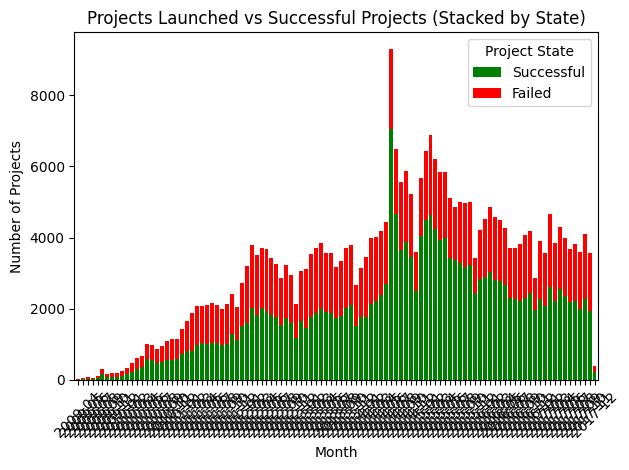

In [19]:
# Convert 'launched' column to datetime format to ensure it's in the right format
data['launched'] = pd.to_datetime(data['launched'])

# Group by the 'launched' date and the 'state' (successful or failed) to count the number of projects
launched_state_counts = data.groupby([data['launched'].dt.to_period('M'), 'state']).size().unstack(fill_value=0)

# Plotting the Stacked Bar Chart
plt.figure(figsize=(12, 6))
launched_state_counts.plot(kind='bar', stacked=True, color=['green', 'red'], width=0.8)

# Add labels and title
plt.xlabel('Month')
plt.ylabel('Number of Projects')
plt.title('Projects Launched vs Successful Projects (Stacked by State)')
plt.xticks(rotation=45)
plt.legend(title='Project State', labels=['Successful', 'Failed'])

# Show the plot
plt.tight_layout()
plt.show()

### Feature engineering and Encoding

In [20]:
# Convert 'deadline' and 'launched' columns to datetime if they aren't already
data['deadline'] = pd.to_datetime(data['deadline'])
data['launched'] = pd.to_datetime(data['launched'])

# Extract year and month from 'deadline'
data['deadline_year'] = data['deadline'].dt.year
data['deadline_month'] = data['deadline'].dt.month

# Extract year and month from 'launched'
data['launched_year'] = data['launched'].dt.year
data['launched_month'] = data['launched'].dt.month

# Check the resulting data
print(data[['deadline_year', 'deadline_month', 'launched_year', 'launched_month']].head())


   deadline_year  deadline_month  launched_year  launched_month
0           2015              10           2015               8
1           2017              11           2017               9
2           2013               2           2013               1
3           2012               4           2012               3
4           2016               4           2016               2


In [21]:
data.shape

(331675, 17)

In [22]:
data=data.drop(['deadline','launched'],axis=1)

In [23]:
data.shape

(331675, 15)

In [24]:
data.head(5)

,category,main_category,currency,goal,pledged,state,backers,country,usd pledged,usd_pledged_real,usd_goal_real,deadline_year,deadline_month,launched_year,launched_month
0,Poetry,Publishing,GBP,1000.0,0.0,failed,0,GB,0.0,0.0,1533.95,2015,10,2015,8
1,Narrative Film,Film & Video,USD,30000.0,2421.0,failed,15,US,100.0,2421.0,30000.00,2017,11,2017,9
2,Narrative Film,Film & Video,USD,45000.0,220.0,failed,3,US,220.0,220.0,45000.00,2013,2,2013,1
3,Music,Music,USD,5000.0,1.0,failed,1,US,1.0,1.0,5000.00,2012,4,2012,3
4,Restaurants,Food,USD,50000.0,52375.0,successful,224,US,52375.0,52375.0,50000.00,2016,4,2016,2


In [25]:
# Encoding the value of state column. 
data['state'] = data['state'].map({'successful': 1, 'failed': 0})
data.head()

,category,main_category,currency,goal,pledged,state,backers,country,usd pledged,usd_pledged_real,usd_goal_real,deadline_year,deadline_month,launched_year,launched_month
0,Poetry,Publishing,GBP,1000.0,0.0,0,0,GB,0.0,0.0,1533.95,2015,10,2015,8
1,Narrative Film,Film & Video,USD,30000.0,2421.0,0,15,US,100.0,2421.0,30000.00,2017,11,2017,9
2,Narrative Film,Film & Video,USD,45000.0,220.0,0,3,US,220.0,220.0,45000.00,2013,2,2013,1
3,Music,Music,USD,5000.0,1.0,0,1,US,1.0,1.0,5000.00,2012,4,2012,3
4,Restaurants,Food,USD,50000.0,52375.0,1,224,US,52375.0,52375.0,50000.00,2016,4,2016,2


In [26]:
# encoding the others columns 
def onehot_encode(df,columns,prefixes):
    df=df.copy()
    for column,prefix in zip(columns,prefixes):
        dumies =pd.get_dummies(df[column],prefix=prefix)
        df=pd.concat([df,dumies],axis=1)
        df=df.drop(column,axis=1)
    return df

In [27]:
data=onehot_encode(
    data,
    ['category','main_category','currency','country'],['cat','main_cat','curr','Country']
)

In [28]:
data.head()

,goal,pledged,state,backers,usd pledged,usd_pledged_real,usd_goal_real,deadline_year,deadline_month,launched_year,...,Country_JP,Country_LU,Country_MX,"Country_N,0""",Country_NL,Country_NO,Country_NZ,Country_SE,Country_SG,Country_US
0,1000.0,0.0,0,0,0.0,0.0,1533.95,2015,10,2015,...,False,False,False,False,False,False,False,False,False,False
1,30000.0,2421.0,0,15,100.0,2421.0,30000.00,2017,11,2017,...,False,False,False,False,False,False,False,False,False,True
2,45000.0,220.0,0,3,220.0,220.0,45000.00,2013,2,2013,...,False,False,False,False,False,False,False,False,False,True
3,5000.0,1.0,0,1,1.0,1.0,5000.00,2012,4,2012,...,False,False,False,False,False,False,False,False,False,True
4,50000.0,52375.0,1,224,52375.0,52375.0,50000.00,2016,4,2016,...,False,False,False,False,False,False,False,False,False,True


### Splitting and Scaling

In [29]:
y= data.loc[:,'state']
X=data.drop('state',axis=1)

In [30]:
y

0         0
1         0
2         0
3         0
4         1
         ..
331670    0
331671    0
331672    0
331673    0
331674    0
Name: state, Length: 331675, dtype: int64

In [31]:
X

,goal,pledged,backers,usd pledged,usd_pledged_real,usd_goal_real,deadline_year,deadline_month,launched_year,launched_month,...,Country_JP,Country_LU,Country_MX,"Country_N,0""",Country_NL,Country_NO,Country_NZ,Country_SE,Country_SG,Country_US
0,1000.0,0.0,0,0.0,0.0,1533.95,2015,10,2015,8,...,False,False,False,False,False,False,False,False,False,False
1,30000.0,2421.0,15,100.0,2421.0,30000.00,2017,11,2017,9,...,False,False,False,False,False,False,False,False,False,True
2,45000.0,220.0,3,220.0,220.0,45000.00,2013,2,2013,1,...,False,False,False,False,False,False,False,False,False,True
3,5000.0,1.0,1,1.0,1.0,5000.00,2012,4,2012,3,...,False,False,False,False,False,False,False,False,False,True
4,50000.0,52375.0,224,52375.0,52375.0,50000.00,2016,4,2016,2,...,False,False,False,False,False,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
331670,6500.0,154.0,4,0.0,154.0,6500.00,2017,4,2017,3,...,False,False,False,False,False,False,False,False,False,True
331671,1500.0,155.0,5,155.0,155.0,1500.00,2011,7,2011,6,...,False,False,False,False,False,False,False,False,False,True
331672,15000.0,20.0,1,20.0,20.0,15000.00,2010,8,2010,7,...,False,False,False,False,False,False,False,False,False,True
331673,15000.0,200.0,6,200.0,200.0,15000.00,2016,2,2016,1,...,False,False,False,False,False,False,False,False,False,True


In [32]:
scaler =StandardScaler()
X=scaler.fit_transform(X)

In [33]:
X

array([[-3.86895001e-02, -1.04181899e-01, -1.20549482e-01, ...,
        -6.76049422e-02, -3.70227773e-02, -1.92794913e+00],
       [-1.27483511e-02, -8.03511832e-02, -1.05012296e-01, ...,
        -6.76049422e-02, -3.70227773e-02,  5.18685885e-01],
       [ 6.69484645e-04, -1.02016365e-01, -1.17442045e-01, ...,
        -6.76049422e-02, -3.70227773e-02,  5.18685885e-01],
       ...,
       [-2.61661868e-02, -1.03985032e-01, -1.19513669e-01, ...,
        -6.76049422e-02, -3.70227773e-02,  5.18685885e-01],
       [-2.61661868e-02, -1.02213231e-01, -1.14334608e-01, ...,
        -6.76049422e-02, -3.70227773e-02,  5.18685885e-01],
       [-3.77949777e-02, -9.90239908e-02, -1.02940671e-01, ...,
        -6.76049422e-02, -3.70227773e-02,  5.18685885e-01]])

In [34]:
# Split into training and testing data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=34)


In [35]:
print(X_train.shape,X_test.shape)

(232172, 221) (99503, 221)


### Modeling and Training 

In [36]:
# Initialize the Random Forest model
Random_model = RandomForestClassifier(class_weight="balanced", random_state=42)

# Train the model
Random_model.fit(X_train, y_train)

# Make predictions
y_pred = Random_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.9957890716862808


In [37]:

# Initialize the Logistic Regression model
logistic_model = LogisticRegression()

# Train the model
logistic_model.fit(X_train, y_train)

# Make predictions
y_pred = logistic_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


Accuracy: 0.89999296503623


C:\Users\prabh\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [38]:

# Initialize the XGBoost Classifier
XG_model = XGBClassifier(objective="binary:logistic", eval_metric="logloss", use_label_encoder=False, random_state=42)

# Train the model
XG_model.fit(X_train, y_train)

# Make predictions
y_pred = XG_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


C:\Users\prabh\AppData\Local\Programs\Python\Python312\Lib\site-packages\xgboost\core.py:158: UserWarning: [17:33:55] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Accuracy: 0.9990754047616655


In [39]:
import joblib  # For saving and loading the scaler
from datetime import datetime



# Save the scaler
joblib.dump(scaler, "scaler.pkl")

# Save the trained model
models = [Random_model, logistic_model, XG_model]
joblib.dump(models, "kickstarter_model.pkl")


['kickstarter_model.pkl']

In [40]:
# Load the scaler and model
scaler = joblib.load("scaler.pkl")  # Assume you've saved the StandardScaler as 'scaler.pkl'
model = joblib.load("kickstarter_model.pkl")  # Assume you've saved your model as 'kickstarter_model.pkl'


In [41]:
from datetime import datetime


def get_user_input(scaler):
    """
    Collects campaign details from the user, preprocesses the data, 
    and scales it to match the training data format.

    Parameters:
    scaler: The scaler used during model training (e.g., StandardScaler).

    Returns:
    Scaled user input data as a DataFrame.
    """
    print("Enter the campaign details:")

    # Numeric input fields
    goal = float(input("Goal Amount (in USD): "))

    # Date fields for calculating launch and deadline months/years
    launch_date = input("Launch Date (YYYY-MM-DD): ")
    deadline = input("Deadline Date (YYYY-MM-DD): ")

    # Convert dates to extract year and month
    launch_date = datetime.strptime(launch_date, "%Y-%m-%d")
    deadline = datetime.strptime(deadline, "%Y-%m-%d")
    launched_year, launched_month = launch_date.year, launch_date.month
    deadline_year, deadline_month = deadline.year, deadline.month

    # Categorical fields for encoding
    category = input("Category (e.g., Art, Technology): ")
    main_category = input("Main Category (e.g., Art, Film): ")
    currency = input("Currency (e.g., USD, GBP): ")
    country = input("Country (e.g., US, GB): ")

    # Example dictionary to match training data format
    input_data = {
        "goal": goal,
        "launched_year": launched_year,
        "launched_month": launched_month,
        "deadline_year": deadline_year,
        "deadline_month": deadline_month,
        # Encoding fields
        **{f"cat_{category}": 1},
        **{f"main_cat_{main_category}": 1},
        **{f"curr_{currency}": 1},
        **{f"Country_{country}": 1},
    }

    # Convert to DataFrame and fill missing columns with 0
    input_df = pd.DataFrame([input_data])
    input_df = input_df.reindex(columns=scaler.feature_names_in_, fill_value=0)

    # Scale the input data
    input_scaled = scaler.transform(input_df)
    return input_scaled


def predict_campaign_success(models, scaler):

    user_input = get_user_input(scaler)
    
    # Collect predictions from all models
    predictions = []
    for model in models:
        prediction = model.predict(user_input)
        predictions.append(prediction[0])  # Store the prediction (1 = Successful, 0 = Failed)

    print("****************************************************")
    print("****************************************************")
    
    # Display predictions from individual models
    for pred, model_name in zip(predictions, ["Logistic Regression", "Random Forest", "XGBoost"]):
        print(f"Prediction from {model_name}: {'Successful' if pred == 1 else 'Failed'}")

    # Perform majority voting
    success_votes = predictions.count(1)  # Count of 'Successful' predictions
    fail_votes = predictions.count(0)  # Count of 'Failed' predictions

    print("****************************************************")
    print("****************************************************")
    if success_votes > fail_votes:
        print("Final Decision: The Campaign is Likely to be Successful.")
        final_decision = "Successful"
    else:
        print("Final Decision: The Campaign is Likely to Fail.")
        final_decision = "Failed"

    return final_decision


# Example usage:
# Assuming `logistic_model`, `random_forest_model`, `xgboost_model`, and `scaler` are already defined
models = [Random_model, logistic_model, XG_model]
final_result = predict_campaign_success(models, scaler)
print(f"The final prediction for the campaign is: {final_result}")


Enter the campaign details:


Goal Amount (in USD):  50000
Launch Date (YYYY-MM-DD):  2016-01-04
Deadline Date (YYYY-MM-DD):  2016-02-26
Category (e.g., Art, Technology):  Restrurant
Main Category (e.g., Art, Film):  Food
Currency (e.g., USD, GBP):  USD
Country (e.g., US, GB):  US


****************************************************
****************************************************
Prediction from Logistic Regression: Failed
Prediction from Random Forest: Failed
Prediction from XGBoost: Failed
****************************************************
****************************************************
Final Decision: The Campaign is Likely to Fail.
The final prediction for the campaign is: Failed
